# Análise Exploratória

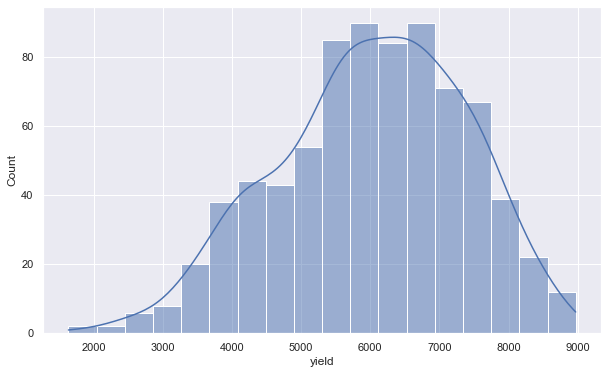

In [44]:
from utils import carrega_dataset
import seaborn as sns
sns.set_theme()
sns.set_theme('notebook')
sns.set(rc={"figure.figsize": [10, 6]})

dataset = carrega_dataset()

sns.histplot(data=dataset, x='yield', kde=True);